In [5]:
#Libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

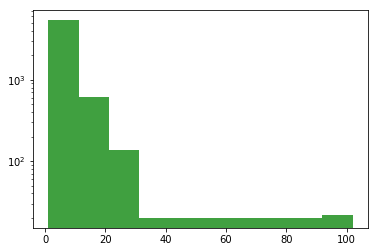

1635

In [26]:
Genesis = pd.read_csv('genesis.csv',delimiter =' ')
Genesis.columns
valids = [entry[2] for entry in Genesis.itertuples() if entry[2]>0 ]
n, bins, patches = plt.hist(valids, facecolor='g', log=True,alpha=0.75)
plt.show()
unmarked = [1 for entry in Genesis.itertuples() if entry[2] <0 ]
len(unmarked)

In [27]:
transactions = pd.read_csv('transaction_till_100000.csv', low_memory=False)
sending = set(transactions.From)
receiving = set(transactions.To)

diff = sending.difference(receiving)

len(diff)

1042

In [4]:
with open('transaction_till_100000.csv','r')as fin, open ('transactions_nodate','w') as fout:
    writer = csv.writer(fout, delimiter=',')            
    for row in csv.reader(fin, delimiter=','):
        writer.writerow([row[0],row[1],row[2]]) #surround entire row with [] in order to avoid delimiter between each char

In [41]:
with open('transaction_till_100000.csv','r')as fin, open ('transactions_normalized','w') as fout:
    writer = csv.writer(fout, delimiter=',')            
    for row in csv.reader(fin, delimiter=','):
        writer.writerow([row[0],row[1],int(row[2])/5000000000000000000]) #surround entire row with [] in order to avoid delimiter between each char

In [5]:
H = nx.read_edgelist("transactions_nodate", nodetype=str, data=(('weight', float),), delimiter=',')
G = nx.convert_node_labels_to_integers(H)
print('number nodes: %f' %len(G.nodes()))
print('number edges:%f' %len(G.edges()))
av_degr = 0
for n in G.nodes():
    av_degr += nx.degree(G, n) 
av_degr = av_degr/len(G.nodes())
print('average degree: %f' %av_degr)
print('Number of components: %f' %nx.number_connected_components(G))
print('average clustering: %f' %nx.average_clustering(G))
print('assortativity: %f' %nx.degree_assortativity_coefficient(G))

number nodes: 7880.000000
number edges:13025.000000
average degree: 3.305838
Number of components: 29.000000
average clustering: 0.284645
assortativity: -0.407424


Text(0,0.5,'$p_k$')

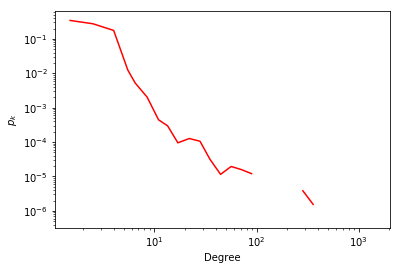

In [6]:
degreesDict = dict(G.degree())
degrees = list(degreesDict.values())
data = degrees

fig01 = powerlaw.plot_pdf(data, color='r')

fig01.set_xlabel("Degree")
fig01.set_ylabel("$p_k$")


<function matplotlib.pyplot.show(*args, **kw)>

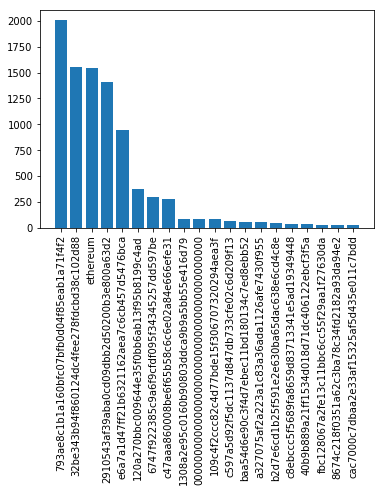

In [7]:
highest_degree_nodes = []
#let alg run on H, integer names of nodes raises problems with plot
for item in sorted(H.degree(), key=lambda x: x[1], reverse=True):
    if len(highest_degree_nodes) == 20:
        break
        
    highest_degree_nodes.append(item)
    
assert(len(highest_degree_nodes) == 20)

cnt = [degr for (node, degr) in highest_degree_nodes]
node = [node for (node, degr) in highest_degree_nodes]

plt.bar(node, cnt)
plt.xticks(rotation = 'vertical')
plt.show

<Figure size 432x288 with 0 Axes>

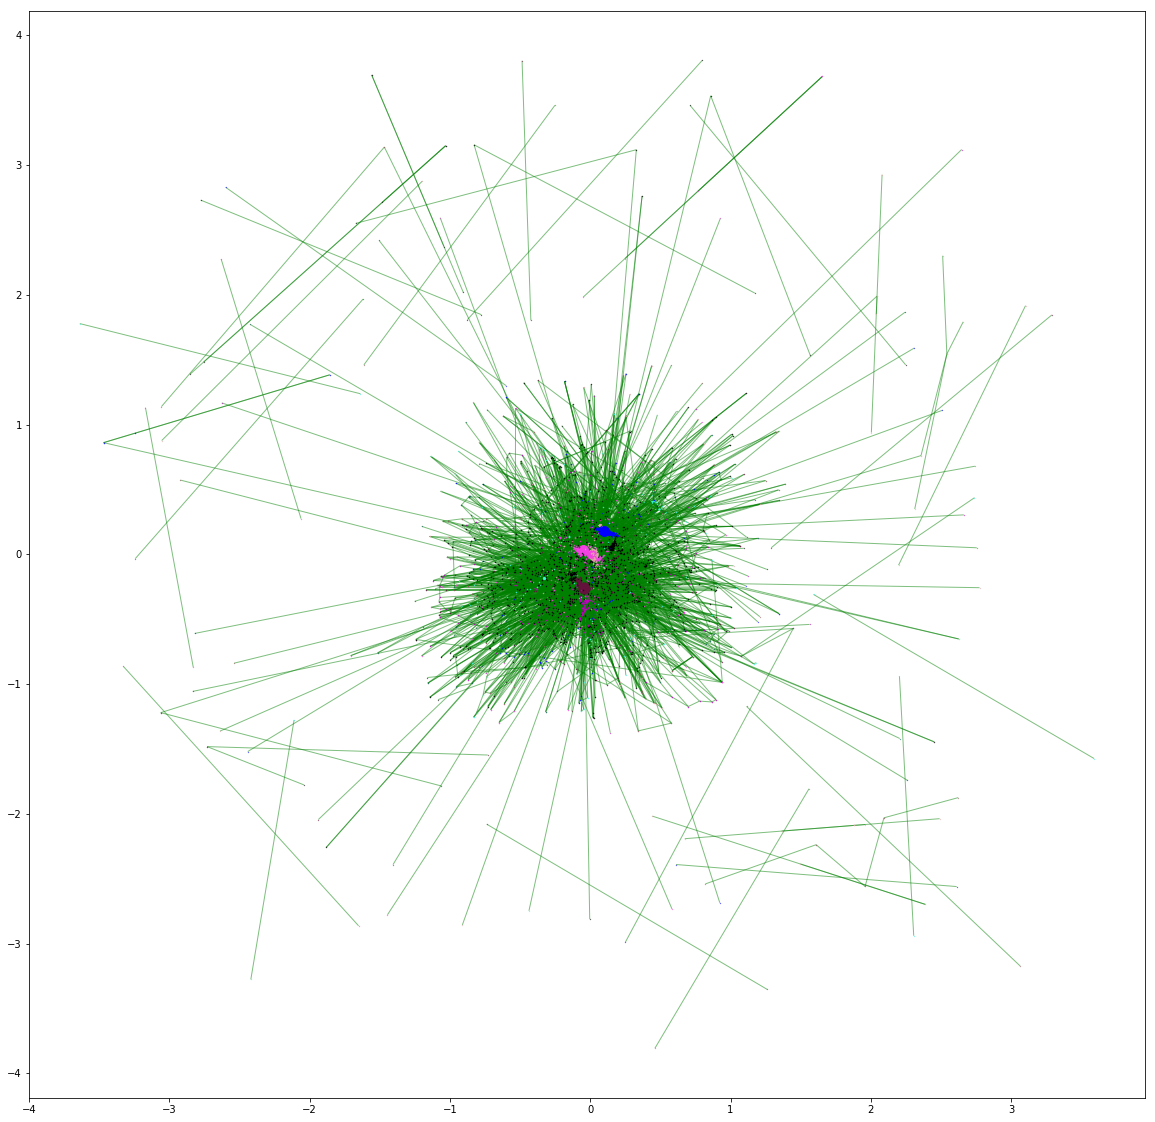

<Figure size 432x288 with 0 Axes>

In [10]:
#Detection of underlying communities
communities = nxcom.best_partition(G)

# taken from https://stackoverflow.com/questions/43541376/how-to-draw-communities-with-networkx 
def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

layout = community_layout(G, communities)

plt.figure(figsize=(20,20)) 

degree_centrality = nx.degree_centrality(G)
colors = {
    0:'black', 
    1:'b',
    2:'#41f4e2',
    3:'#f441e2',
    4:'#000000',
    5:'#136357',
    6:'#63133c',
    7:'#935a5e',
    8:'#e0a6aa',
    9:'m'
}

for node in G.nodes():
    nx.draw_networkx_nodes(G,pos=layout, node_size=500*degree_centrality[node], nodelist=[node], node_color=colors[communities[node]%10])

#nx.draw_networkx_labels(G,layout,font_size=15, font_color = 'r')
nx.draw_networkx_edges(G,pos=layout, alpha = 0.5, edge_color='g')
plt.figure()

<function matplotlib.pyplot.show(*args, **kw)>

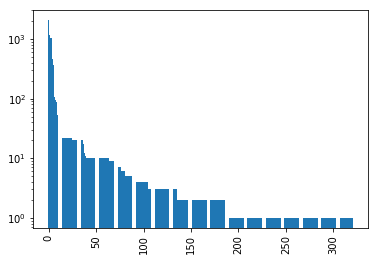

In [20]:
#Community Analysis

comms = {}
for node, community in communities.items():
    if community not in comms:
        comms[community] = []
        
    comms[community].append(node)
    
# first print members only
#for c in comms.keys():
   # print('community {c} has members: %f' %comms[c])
    
#for c in comms.keys():
 #   subgraph = G.subgraph(comms[c])
  #  print('community {%i} has density: %f' %(c, nx.density(subgraph)))
   # print('community {%i} has average clustering coefficient: %f' %(c,nx.average_clustering(subgraph)))
    #print('community {%i} has %i members' %(c, len(comms[c])))
    
cnt = sorted([len(comms[c]) for c in comms.keys()],reverse=True)
node = [c for c in comms.keys()]

plt.bar(node, cnt)
#plt.xscale('log')
plt.yscale('log')
plt.xticks(rotation = 'vertical')
plt.show

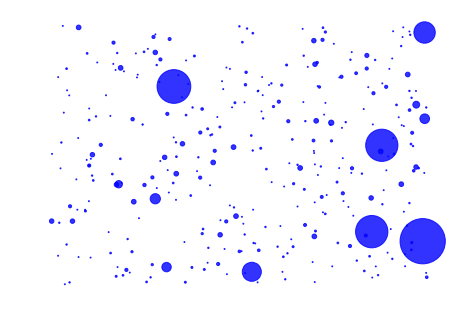

In [12]:
#plot communities according to their size

C = nx.Graph()
for c in comms.keys():
    C.add_node(c)

size = [len(comms[c]) for c in comms.keys()]
nx.draw_random(C, node_size=size,alpha=0.8,node_color='b')

0.8488063660477454

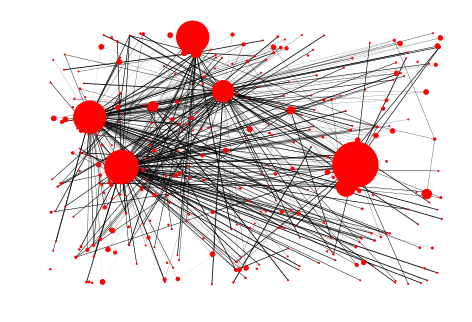

In [13]:
Ind = nxcom.induced_graph(communities,G)
w = [weight/320 for (edge,weight) in Ind.edges()] #320 is maximum weight of an edge!! this is wrong!!

labels = nx.get_edge_attributes(Ind,'weight')
#nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
nx.draw_random(Ind,width =w, node_size=size)

#weights? Self-loops?

In [22]:
w = [weight for (edge,weight) in Ind.edges()]
max(w)

320

In [45]:
#Some analysis respecting the directions of the links & the weights
D = nx.read_edgelist("transactions_normalized", nodetype=str, data=(('weight', float),), delimiter=',',create_using= nx.DiGraph())
#print(max(value for (node,value) in D.in_degree()))
#print(max(value for (node,value) in D.out_degree()))

(id, d)=max(D.in_degree(), key=lambda p: p[1])

weight =0
for (u,v,w) in D.in_edges(id,data=True):
    #weight += w.value()
    print(w)


{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight

{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight': 0.0}
{'weight